# Python Lab 3: Preprocessing and Linear Regression

### Part 0: Import Packages and Data

In [1]:
# Import some pacakges
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# As usual, we will try to illustrate everything using the df_mydata data set
import urllib.request 
# urllib.request.urlretrieve("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", "iris.csv")

df_mydata = pd.read_csv('NewSeoulBikeData.csv')
df_mydata = df_mydata[df_mydata['Hour']>=11]
df_mydata = df_mydata[df_mydata['Hour']<=15]
# View the type
type(df_mydata)

# # Specify the column names that you want to use as features in this model.
headers =  ["Rented Bike Count","Hour","Temperature","Humidity","Seasons"]
df_mydata.columns = headers

# If your data set is large, this the "head()" function let's you view the first few entries to see what's inside.
df_mydata.head()

,Rented Bike Count,Hour,Temperature,Humidity,Seasons
11,360,11,-0.5,21,Winter
12,449,12,1.7,23,Winter
13,451,13,2.4,25,Winter
14,447,14,3.0,26,Winter
15,463,15,2.1,36,Winter


## Part 1: Cleaning and organizing data

Since we will perform simple linear regression (1 independent variable and 1 label = 1 dependent variable), we will need to choose one column for the independent variable and one column for the label.  You may also want to "normalize" your data if your columns use different units (for example if one variable is measured in cm and one in km or liters, etc).

### Part 1.1: Selecting Numerical Values

We would like to normalize and reorganize the columns in our data set without needing to specfiy individual columns. However, we will get an error message if trying to normalize a column like "species" that does not contain numerical data. Thus, we will first grab the subset of the columns corresponding to numerical data. (Discussed further on: https://towardsdatascience.com/an-easy-way-to-divide-your-dataset-based-on-data-types-with-pandas-4625411a57b)

In [3]:
# Speficy a DataFrame by selecting columns of a certain type.
df_mydata_numerical = df_mydata.select_dtypes(include=['float64', 'int64'])
df_mydata_categorical = df_mydata.select_dtypes(include='object')

In [4]:
# View numerical columns:
df_mydata_numerical.head()

,Rented Bike Count,Hour,Temperature,Humidity
11,360,11,-0.5,21
12,449,12,1.7,23
13,451,13,2.4,25
14,447,14,3.0,26
15,463,15,2.1,36


In [5]:
# View categorical columns:
df_mydata_categorical.head()

,Seasons
11,Winter
12,Winter
13,Winter
14,Winter
15,Winter


### Part 1.2: Preprocessing to Select Features

We'ves seen that PCA can be applied to a subset of features in your data. This is often done to remove noise from dimension that are not important for your specific application. If you don't know which features are important, you can reorder your columns based on standard deviation. Normalization can be used to scale the features first. There are different ways to normalize data.  Note most methods do not create normally distributed data.  More information  can be found at https://scikit-learn.org/stable/modules/preprocessing.html#scaling-features-to-a-range 

Since the all measurements in the iris data set are in centimeters, we do NOT need to normalize this data set.  But you can modify the following code if you should normalize columns in your data set.

In [6]:
# Scikit-Learn has the following function to normalize data.
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

In [7]:
# Here is how to normalize each column in the iris data set.
# Code is based on https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame

bike_temp = df_mydata_numerical.values    # returns a numpy array, which is needed to use the function.
bike_scaled = min_max_scaler.fit_transform(bike_temp)     # creates a scaled numpy array
df_mydata_norm = pd.DataFrame(bike_scaled,columns=df_mydata_numerical.columns)  # convert back to DataFrame with same column names

In [8]:
# All values are now between 0 and 1
df_mydata_norm.head()

,Rented Bike Count,Hour,Temperature,Humidity
0,0.154573,0.00,0.275046,0.125000
1,0.192787,0.25,0.315118,0.147727
2,0.193645,0.50,0.327869,0.170455
3,0.191928,0.75,0.338798,0.181818
4,0.198798,1.00,0.322404,0.295455


In [9]:
# View column statistics
df_mydata_norm.describe()

,Rented Bike Count,Hour,Temperature,Humidity
count,1825.000000,1825.00000,1825.000000,1825.000000
mean,0.310996,0.50000,0.575158,0.410349
std,0.200426,0.35365,0.216936,0.219136
min,0.000000,0.00000,0.000000,0.000000
25%,0.129240,0.25000,0.402550,0.250000
50%,0.305281,0.50000,0.612022,0.375000
75%,0.456848,0.75000,0.748634,0.522727
max,1.000000,1.00000,1.000000,1.000000


Taking a look at the column statistics, we can see that some columns have a higher standard deviation than others. These features contribute more to the variance of the data set. We can re-order the columns so that they are decreasing based on their standard deviation

In [10]:
# Obtain a list with the ordered names of the important columns.
# https://stackoverflow.com/questions/58385479/how-to-sort-a-pandas-dataframe-by-the-standard-deviations-of-its-columns

bike_column_order_std = df_mydata_norm.std().sort_values(ascending=False).index
df_mydata_norm_std = df_mydata_norm[bike_column_order_std]

In [11]:
# We can see the columns are indeed reordered.
df_mydata_norm_std.head()

,Hour,Humidity,Temperature,Rented Bike Count
0,0.00,0.125000,0.275046,0.154573
1,0.25,0.147727,0.315118,0.192787
2,0.50,0.170455,0.327869,0.193645
3,0.75,0.181818,0.338798,0.191928
4,1.00,0.295455,0.322404,0.198798


In [36]:
from IPython.display import HTML

def hover(hover_color="#ffff99"):
    return dict(selector="tr:hover", props=[("background-color","%s" % hover_color)])

styles=[hover(), dict(selector="th", props=[("font-size", "150%"),("text-align", "center")]), dict(selector="th.row_heading", props=[("font-size", "150%"),("text-align", "center")]), dict(selector="td", props=[("font-size", "150%"),("text-align", "center")])]

df=df_mydata_norm_std.describe().style.set_table_styles(styles)
df

,Hour,Humidity,Temperature,Rented Bike Count
count,1825.000000,1825.000000,1825.000000,1825.000000
mean,0.500000,0.410349,0.575158,0.310996
std,0.353650,0.219136,0.216936,0.200426
min,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.250000,0.402550,0.129240
50%,0.500000,0.375000,0.612022,0.305281
75%,0.750000,0.522727,0.748634,0.456848
max,1.000000,1.000000,1.000000,1.000000


### Part 3.3: Selecting a Subset of Features

Now with the reordered, normalized DataFrame, we can select a subset of the most important features by grabbing the first few columns. We can do this without directly specifying the column names using "iloc" on the DataFrame and making a copy of the selected columns. 

In [41]:
# Select a specified number of columns by changing the value in the brackets.

# Selects the first 3 columns
df_mydata_norm_std_subset = df_mydata_norm_std.iloc[:, [0,3]].copy()

# Selects the first 2 columns
#df_mydata_norm_std_subset = df_mydata_norm_std.iloc[:, 0:2].copy()

In [42]:
# View the subset of the DataFrame
df_mydata_norm_std_subset.head()

,Hour,Rented Bike Count
0,0.00,0.154573
1,0.25,0.192787
2,0.50,0.193645
3,0.75,0.191928
4,1.00,0.198798


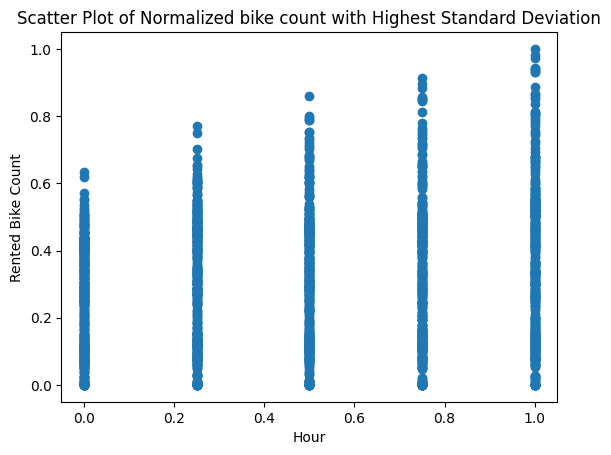

In [43]:
# We can also plot the two most important features by referencing them with "iloc".
# Note that since Python is 0-indexed, the first column has index 0 and the second has index 1.

plt.scatter(df_mydata_norm_std_subset.iloc[:,0],df_mydata_norm_std_subset.iloc[:,1])
plt.xlabel(df_mydata_norm_std_subset.columns[0])
plt.ylabel(df_mydata_norm_std_subset.columns[1])
plt.title('Scatter Plot of Normalized bike count with Highest Standard Deviation');

### Part 1.4: PCA  on Important Features

We can now use PCA on just these most important features. For the iris data set, we will try this first using the entire normalized data set, and then using just the two most important features. In both cases, we'll try 2-dimensional PCA.

In [44]:
# Importa packages for PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

Explained Variance =  [0.12891117 0.06671076]
Principal Components =  [[-0.97261889  0.12536456 -0.10770772 -0.16338687]
 [ 0.15490883 -0.21401291 -0.77299211 -0.57678846]]


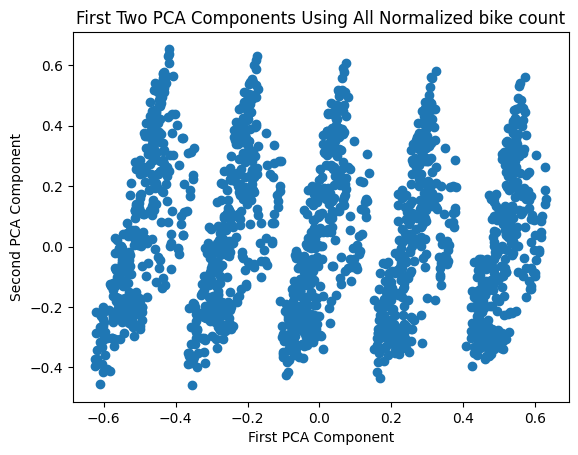

In [45]:
# PCA on the entire list of feautres

# Separating out the features
X_bike = df_mydata_norm_std.values

# Transform data set
pca_bike = PCA(n_components=2).fit_transform(X_bike)

# Take a look at the PCA vectors
print('Explained Variance = ', PCA(n_components=2).fit(X_bike).explained_variance_)
print('Principal Components = ', PCA(n_components=2).fit(X_bike).components_)

# Turn this back into a data frame
pca_bike_df_full = pd.DataFrame(data = pca_bike)

# Plot these components in a scatter plot.
plt.scatter(pca_bike_df_full.iloc[:,0],pca_bike_df_full.iloc[:,1])
plt.xlabel('First PCA Component')
plt.ylabel('Second PCA Component')
plt.title('First Two PCA Components Using All Normalized bike count');

Explained Variance =  [0.12649199 0.03874729]
Principal Components =  [[ 0.99185544  0.12736872]
 [-0.12736872  0.99185544]]


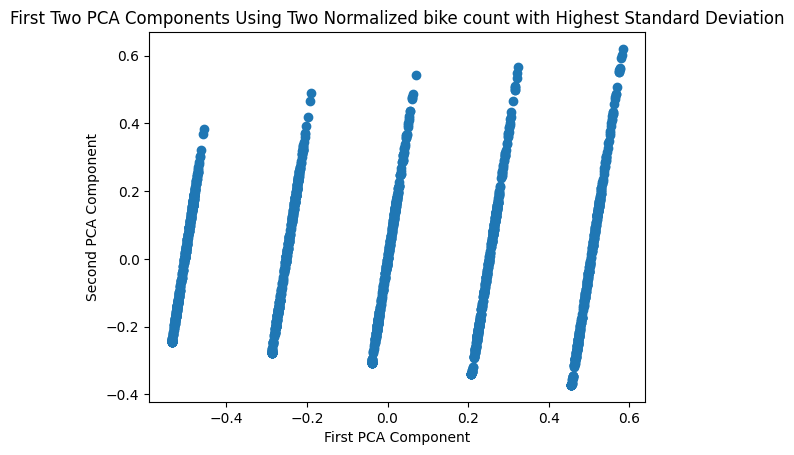

In [46]:
# PCA on the two most important features.

# Separating out the features
X_bike = df_mydata_norm_std_subset.values

# Transform data set
pca_bike = PCA(n_components=2).fit_transform(X_bike)

# Take a look at the PCA vectors
print('Explained Variance = ', PCA(n_components=2).fit(X_bike).explained_variance_)
print('Principal Components = ', PCA(n_components=2).fit(X_bike).components_)

# Turn this back into a data frame
pca_bike_df_subset = pd.DataFrame(data = pca_bike)

# Plot these components in a scatter plot.
plt.scatter(pca_bike_df_subset.iloc[:,0],pca_bike_df_subset.iloc[:,1])
plt.xlabel('First PCA Component')
plt.ylabel('Second PCA Component')
plt.title('First Two PCA Components Using Two Normalized bike count with Highest Standard Deviation');

Notice that these plots are not identical.

## Part 2:  Linear Regression

In [26]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from scipy import stats

As long as your data set includes two or more columns with numerical data, it can be used with linear regression.  Whether the results are useful or not will depend on your data.  Please comment on whether or not linear regression appears to be applicable and useful for your data set.  


A very friendly tutorial with with Python examples is avaible on the website Towards Data Science: https://towardsdatascience.com/the-complete-guide-to-linear-regression-in-python-3d3f8f06bf8. 

In [27]:
# To illustrate this with the iris data set, we will restrict to one type of flower and compare sepal length and width.
df_setosa = df_mydata.loc[df_mydata['Seasons'] == 'Spring']

In [28]:
# This takes the subset of the irises corresponding to setosa
df_setosa.shape

(460, 5)

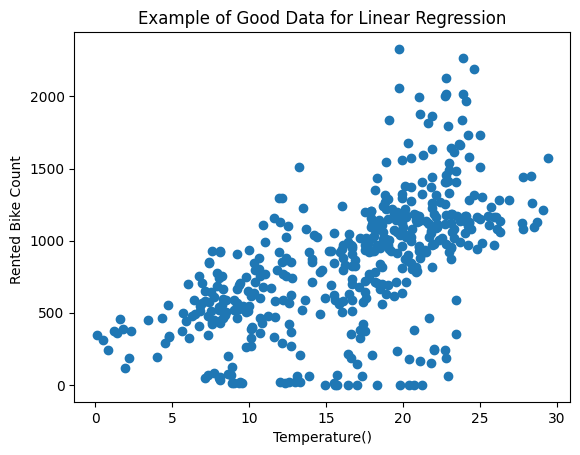

In [29]:
# Visually, we can see a reasonably linear relationship between sepal length and width
plt.scatter(df_setosa['Temperature'], df_setosa['Rented Bike Count'])
plt.xlabel('Temperature()')
plt.ylabel('Rented Bike Count ')
plt.title('Example of Good Data for Linear Regression');

### Part 2.1: Finding the least squares line

You can calculate the least squares line between any two components. To illustrate this with the setosa data set, we choose sepal length and sepal width.

In [30]:
# The least squares line through this data can be computed as follows

X_setosa = df_setosa['Temperature'].values.reshape(-1,1)     # NOTE: the reshape is needed to force the correct dimensions
Y_setosa = df_setosa['Rented Bike Count'].values.reshape(-1,1)

reg_setosa = LinearRegression()
reg_setosa.fit(X_setosa, Y_setosa)

print("The linear model is: Y = {:.5} + {:.5}X".format(reg_setosa.intercept_[0], reg_setosa.coef_[0][0]))

The linear model is: Y = 124.86 + 43.689X


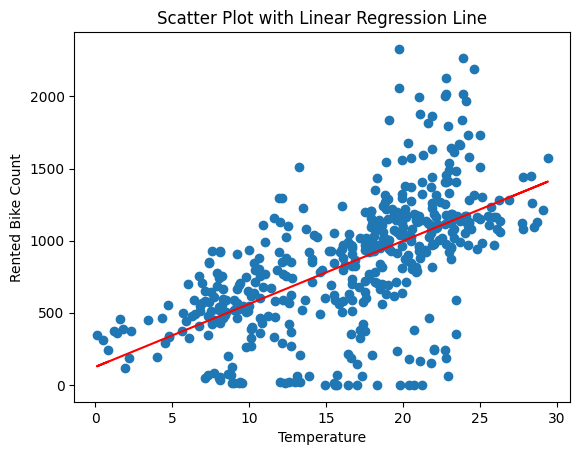

In [31]:
# We can view this line overlaying the scatter plot

plt.scatter(X_setosa,Y_setosa)
plt.plot(X_setosa,reg_setosa.predict(X_setosa),"r-")
plt.xlabel('Temperature')
plt.ylabel('Rented Bike Count')
plt.title('Scatter Plot with Linear Regression Line');

### Part 2.2: Examining the statistics

After you've fit a regression model, you can print out a lot statistical information about it.
(https://stackoverflow.com/questions/27928275/find-p-value-significance-in-scikit-learn-linearregression)

In [32]:
X_setosa_2 = sm.add_constant(X_setosa)
est_setosa = sm.OLS(Y_setosa, X_setosa_2)
est_setosa_2 = est_setosa.fit()
print(est_setosa_2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     257.8
Date:                Thu, 18 Apr 2024   Prob (F-statistic):           2.38e-46
Time:                        16:39:43   Log-Likelihood:                -3368.3
No. Observations:                 460   AIC:                             6741.
Df Residuals:                     458   BIC:                             6749.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        124.8606     48.022      2.600      0.0

For more information regarding this output, see https://www.statology.org/linear-regression-python/

In particular, note that Prob (F-statistic) is the p-value associated with the overall F-statistic. 

Base on this p-value, can you conclude the linear regression is/is not useful for your data?


Base on my p-value, looks like linear regression is useful for my data. But I still need to try more method to find the exact relation between temperature and rented bike count.

For the first part, the principle component analysis (PCA), helps us reduced the dimension of data, but did not change the basic information for data. It simplifies the analysis and visualization of the data. We usually choose the largest variance for analysis. PCA can also be used to visualize high-dimensional data in lower-dimensional space. It allows for the visualization of clusters, patterns, and relationships between data points. 

In my data, after normalized the data, we compute the mean and variance for each column. We found "hour" has the greatest variance, so this column is our first PCA component. 

For the second part, I find linear regression can tell the relationships between multiple independent variables and a dependent variable. It allows us to understand how changes in one or more independent variables affect the dependent variable.

In this lab, I rechoose the data set to make the result more reasonable. For bike rent, the better time to choose for analysis data is 11 am to 3 pm. Since this period is when people are working, the frequency of bicycle use will increase, which helps us study the data. And for the seasons, I choose Spring, since from the visulized graph in clustering, I noticed that the data in spring looks more closer than a linear graph.

From the previous output, we have the following results:

R-squared is 0.360, this is known as the coefficient of determination. It is the proportion of the variance in the response variable that can be explained by the predictor variables. Here, 36% of the variance in bike count rented can be explained by temperature.

F-statistic is 257.8, this is the overall F-statistic for the regression model.

Prob is 2.38e-46, it tells us whether or not the regression model as a whole is statistically significant. Our p value is much less than 0.05, which means temperature have statistically significant association with bike count rented.

We can write the estimated regression equation by using the coef in this form, that is: $y=43.689x+124.86$